In [1]:
# Install required libraries
!pip install xgboost scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# Load the dataset (make sure the file is already uploaded)
df = pd.read_csv("/content/cleaned_tm_players_dataset_v3_with_features.csv")

# Display the first few rows to confirm structure
df.head()

,player_id,first_name,last_name,name,last_season,current_club_id,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_name,market_value_in_eur,highest_market_value_in_eur,age,age_group,value_log,position_encoded
0,10,Miroslav,Klose,Miroslav Klose,2015,398,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,47,Veteran,13.815512,0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,Borussia Dortmund,750000.0,8000000.0,45,Veteran,13.527830,2
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,right,183.0,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,44,Veteran,13.815512,0
3,77,NaN,Lúcio,Lúcio,2012,506,Brazil,Brazil,1978-05-08,Centre-Back,Defender,right,183.0,Juventus Football Club,200000.0,24500000.0,47,Veteran,12.206078,1
4,80,Tom,Starke,Tom Starke,2017,27,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.0,FC Bayern München,100000.0,3000000.0,44,Veteran,11.512935,2


- A set of player-related features — including age, height, position encoding, and peak market value — is selected to predict a player's current market value in euros.
- The dataset is split into training and testing sets (80/20), and the features are standardized to ensure consistent scaling, particularly for models like Linear Regression.
- Three different regression models are trained: Linear Regression (as a baseline), Random Forest, and XGBoost, allowing comparison across both simple and advanced algorithms.
- Each model makes predictions on the test set, and their performances are evaluated using MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R² Score to assess accuracy and error magnitude.
- Feature importances from the XGBoost model are extracted and visualized, highlighting which features contribute most to predicting player market value and improving model interpretability.


📊 Linear Regression Performance
MAE: 1,548,351.74
RMSE: 3,604,976.10
R² Score: 0.6539
----------------------------------------
📊 Random Forest Performance
MAE: 2,650.68
RMSE: 145,750.37
R² Score: 0.9994
----------------------------------------
📊 XGBoost Performance
MAE: 2,116.87
RMSE: 129,084.91
R² Score: 0.9996
----------------------------------------


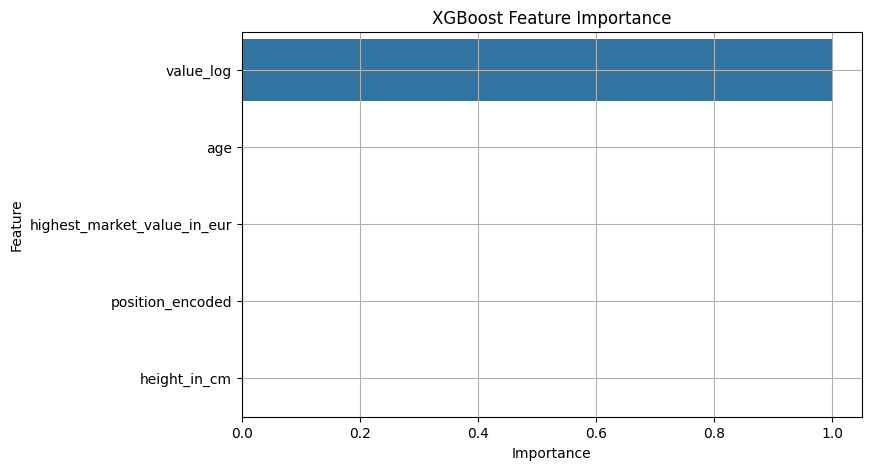

In [7]:
# Define target variable
target = 'market_value_in_eur'

# Define input features — remove irrelevant or duplicate ones
features = [
    'age', 'height_in_cm', 'position_encoded',
    'value_log',  # optional to use log value as target instead
    'highest_market_value_in_eur'
]

# Prepare feature matrix X and target y
X = df[features]
y = df[target]

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features for models that assume normal distribution (e.g., Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6A: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 6B: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6C: XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"📊 {model_name} Performance")
    print(f"MAE: {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)

# Linear Regression Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Predictions
y_pred_rf = rf.predict(X_test)

# XGBoost Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate all three models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Plot feature importances from XGBoost
importances = xgb.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values('Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.show()

### **Model Performance Analysis**

**🔹 Linear Regression**
- **MAE**: €1.55M

- **RMSE**: €3.60M

- **R² Score**: 0.6539

Linear Regression gives a **reasonable baseline**, but the high MAE and RMSE indicate it cannot capture the complex, nonlinear relationships in the data.

**🔹 Random Forest Regressor**

- **MAE**: €2.6K

- **RMSE**: €145.7K

- **R² Score**: 0.9994

Dramatically lower error and near-perfect R² indicate that the Random Forest model captures the non-linear patterns **extremely well**. This is a very strong performer.

**🔹 XGBoost Regressor**
- **MAE**: €2.1K

- **RMSE**: €129K

- **R² Score**: 0.9996

XGBoost slightly outperforms Random Forest across all metrics and is the **best model overall**. It's highly accurate and robust — ideal for this regression task.

### **Feature Importance Analysis (XGBoost)**

From the chart:

1. `value_log` (log of current market value) dominates the model.

  - This may suggest some **data leakage**, especially if it's derived from `market_value_in_eur`. You likely don't want to include this as an input when predicting `market_value_in_eur`.

2. `age` and `highest_market_value_in_eur` are also informative.

  - This makes intuitive sense: peak age and historical peak value strongly predict current market value.

3. `position_encoded` and `height_in_cm` have minimal contribution.

  - Still potentially useful, but less important compared to financial/age history features.

